In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AR,ARResults,AutoReg

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [221]:
rates = pd.read_csv('usdinr.csv')
rates = rates[3493:5682] # Decide the amount of data we need.
rates = rates.iloc[::7,:] # Getting weekly data
rates

,Date,usdinr,jpyinr,eurinr
3493,26-07-2010 23:58,44.7330,0.634620,62.788
3500,02-08-2010 23:58,45.2330,0.657618,61.510
3507,09-08-2010 23:58,45.5400,0.674216,61.472
3514,16-08-2010 23:58,45.7400,0.659718,62.686
3521,23-08-2010 23:58,46.1300,0.667824,62.709
...,...,...,...,...
5649,20-06-2016 23:58,64.4148,0.608541,70.056
5656,27-06-2016 23:58,64.5152,0.612532,71.467
5663,04-07-2016 23:58,64.3200,0.614950,72.660
5670,11-07-2016 23:58,63.9650,0.609718,72.426


In [185]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 3493 to 5677
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    313 non-null    object 
 1   usdinr  313 non-null    float64
 2   jpyinr  313 non-null    float64
 3   eurinr  313 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB


In [222]:
# All entries are non null

In [223]:
scaled_rates = rates.copy(deep=True)
for i in range(2,len(scaled_rates)-2):
    for j in range(1,4):
        scaled_rates.iloc[i,j] = sum(scaled_rates.iloc[(i-2):(i+3),j])/5
for col in scaled_rates:
    if col != 'Date':
        scaled_rates[col] = scaled_rates[col]*100/scaled_rates[col].mean()
scaled_rates

,Date,usdinr,jpyinr,eurinr
3493,26-07-2010 23:58,73.469747,106.323080,85.858629
3500,02-08-2010 23:58,74.290950,110.176160,84.111045
3507,09-08-2010 23:58,74.688740,110.374063,85.099701
3514,16-08-2010 23:58,75.467964,111.194955,85.347208
3521,23-08-2010 23:58,76.905608,111.931352,85.866560
...,...,...,...,...
5649,20-06-2016 23:58,106.038339,102.175500,96.823116
5656,27-06-2016 23:58,105.791955,102.382480,97.764730
5663,04-07-2016 23:58,105.565841,102.253387,98.407639
5670,11-07-2016 23:58,105.056499,102.151020,99.037986


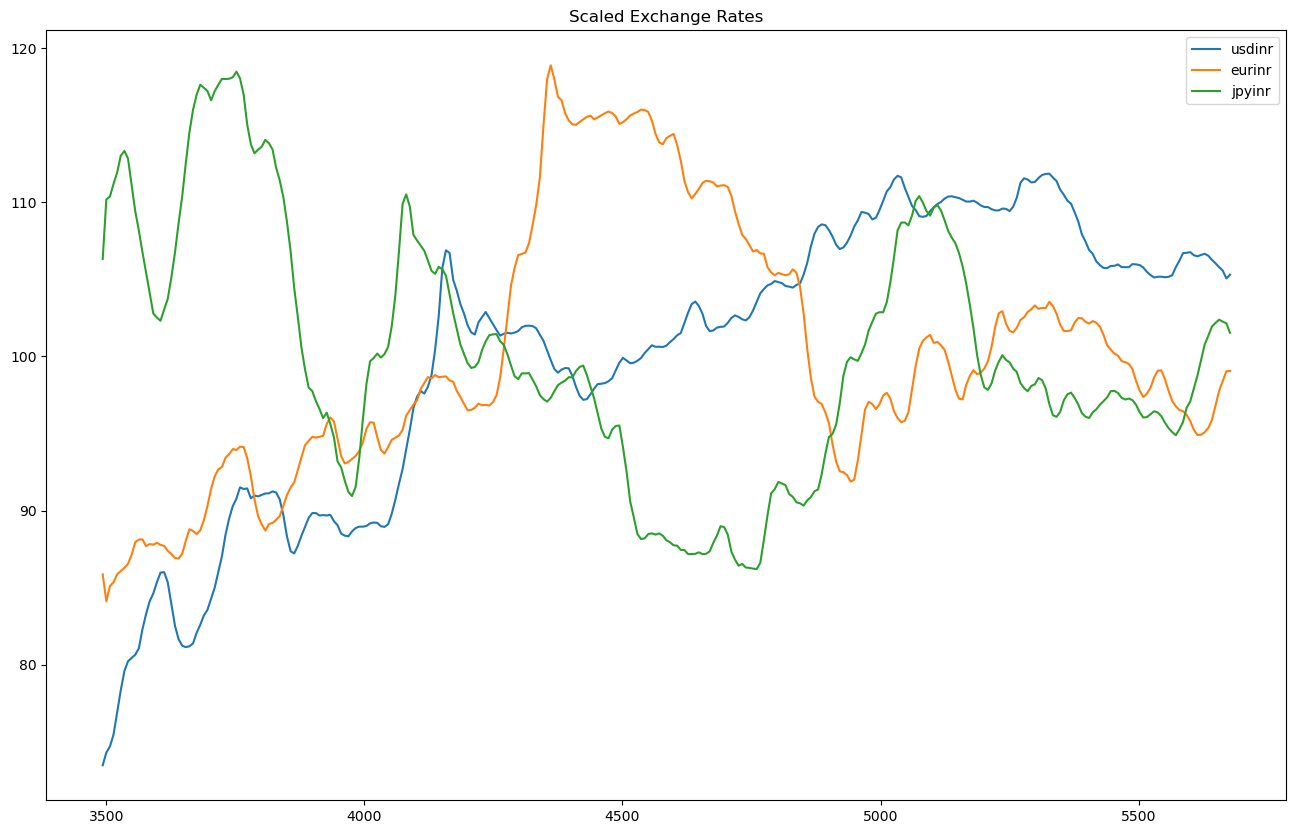

In [224]:
plt.figure(figsize = (16,10))
plt.title("Scaled Exchange Rates")
scaled_rates['usdinr'].plot(legend=True)
scaled_rates['eurinr'].plot(legend=True)
scaled_rates['jpyinr'].plot(legend=True)
plt.show()

In [225]:
def aug_df(series):
    result = adfuller(series.dropna(), autolag='AIC')
    
    print('ADF Statistic: %f' % result[0])

    print('p-value: %f' % result[1])

    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
    print(result)

In [226]:
aug_df(rates['usdinr'])
aug_df(rates['jpyinr'])
aug_df(rates['eurinr'])

ADF Statistic: -2.910363
p-value: 0.044156
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary
(-2.910362688507657, 0.0441561602354429, 0, 312, {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}, 616.0127246179417)
ADF Statistic: -2.008849
p-value: 0.282707
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Failed to Reject Ho - Time Series is Non-Stationary
(-2.0088487030784403, 0.2827067798242695, 0, 312, {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}, -1858.014830631354)
ADF Statistic: -2.089786
p-value: 0.248642
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Failed to Reject Ho - Time Series is Non-Stationary
(-2.0897857118390593, 0.24864160426202236, 2, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, 919.0465426987598)


In [227]:
withoutdate = rates.drop('Date',axis=1)
rates_1 = withoutdate.diff()
rates_1.dropna(inplace=True) # to delete the first row
aug_df(rates_1['usdinr'])
aug_df(rates_1['jpyinr'])
aug_df(rates_1['eurinr'])

ADF Statistic: -16.644214
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary
(-16.644214113083827, 1.6247799547087238e-29, 0, 311, {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}, 617.6569966295592)
ADF Statistic: -16.741302
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary
(-16.741302294450918, 1.3575354723679035e-29, 0, 311, {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}, -1853.4880957390496)
ADF Statistic: -14.251160
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary
(-14.251159796840826, 1.4802511649327352e-26, 1, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, 918.8454365955672)


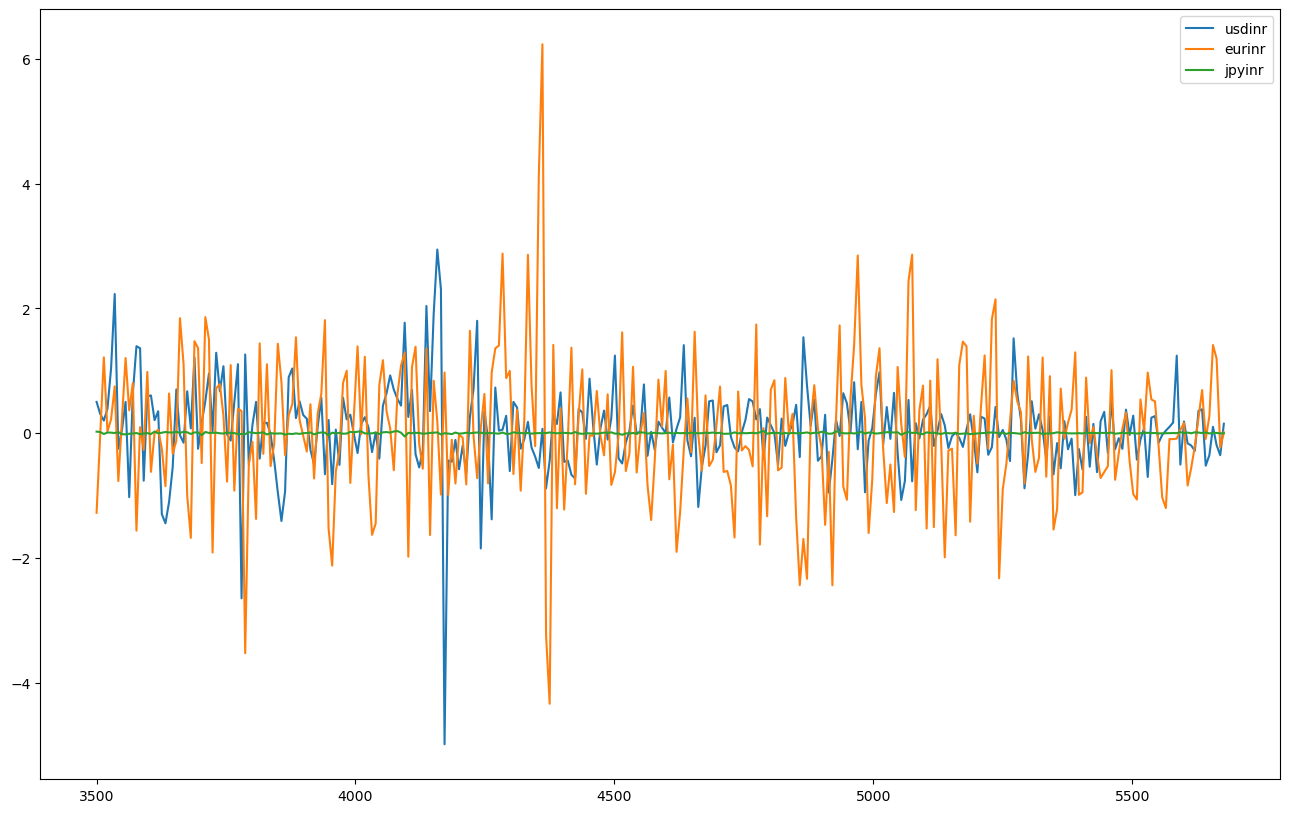

In [228]:
plt.figure(figsize = (16,10))
rates_1['usdinr'].plot(legend=True)
rates_1['eurinr'].plot(legend=True)
rates_1['jpyinr'].plot(legend=True)
plt.show()


In [229]:
# Figure show reasonable stationarity

In [230]:
# 80:20 Split
train,test = rates_1[:int(0.8*len(rates_1))],rates_1[int(-0.2*len(rates_1)):]
train

,usdinr,jpyinr,eurinr
3500,0.5000,0.022998,-1.278
3507,0.3070,0.016598,-0.038
3514,0.2000,-0.014498,1.214
3521,0.3900,0.008106,0.023
3528,1.0400,0.006711,0.223
...,...,...,...
5208,0.2630,-0.001328,0.428
5215,0.2322,0.001520,1.245
5222,-0.3487,0.007313,-0.243
5229,-0.2262,0.009376,1.826


In [231]:
len(test)

62

In [232]:
# Fitting a VAR(p) model by using the AIC criterion

In [233]:
# Intuitively felt that the rate of a particular week should atleast be a funciton of the last 8 observations i.e. atleast 2 month
# Therefore intention was to choose the value of p that would give the best AIC value for p greater than 8 and less than 24 that is 6 months
for p in range(8,25):
    model = VAR(train)
    results = model.fit(p)
    print('Order =', p)
    print('AIC : ', results.aic)

Order = 8
AIC :  -8.796588888357341
Order = 9
AIC :  -8.753387975165147
Order = 10
AIC :  -8.734451761512064
Order = 11
AIC :  -9.121925618460745
Order = 12
AIC :  -9.075881942857587
Order = 13
AIC :  -9.033655426199363
Order = 14
AIC :  -9.014543600688027
Order = 15
AIC :  -8.97238165374125
Order = 16
AIC :  -8.925253848888142
Order = 17
AIC :  -8.955638670944039
Order = 18
AIC :  -8.90622867655607
Order = 19
AIC :  -8.87117496850735
Order = 20
AIC :  -8.837114499092426
Order = 21
AIC :  -8.814347427451883
Order = 22
AIC :  -8.77410613111307
Order = 23
AIC :  -8.726697601941897
Order = 24
AIC :  -8.702234388187442


In [234]:
# A VAR(11) model gives us the least value of the AIC hence
# we take the order of time series as 11

In [235]:
n = len(test)
p = 11

In [236]:
results = model.fit(p)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Nov, 2022
Time:                     11:37:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.63381
Nobs:                     238.000    HQIC:                  -8.52219
Log likelihood:           174.387    FPE:                0.000109891
AIC:                     -9.12193    Det(Omega_mle):     7.36183e-05
--------------------------------------------------------------------
Results for equation usdinr
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.080210         0.042343            1.894           0.058
L1.usdinr          0.065813         0.056344            1.168           0.243
L1.jpyinr          3.372169         3.637904            0.927          

In [237]:
p

11

In [238]:
n

62

In [239]:
idx = pd.date_range(rates.iloc[-n]['Date'],periods=n,freq='7D')
idx

DatetimeIndex(['2015-05-18 23:58:00', '2015-05-25 23:58:00',
               '2015-06-01 23:58:00', '2015-06-08 23:58:00',
               '2015-06-15 23:58:00', '2015-06-22 23:58:00',
               '2015-06-29 23:58:00', '2015-07-06 23:58:00',
               '2015-07-13 23:58:00', '2015-07-20 23:58:00',
               '2015-07-27 23:58:00', '2015-08-03 23:58:00',
               '2015-08-10 23:58:00', '2015-08-17 23:58:00',
               '2015-08-24 23:58:00', '2015-08-31 23:58:00',
               '2015-09-07 23:58:00', '2015-09-14 23:58:00',
               '2015-09-21 23:58:00', '2015-09-28 23:58:00',
               '2015-10-05 23:58:00', '2015-10-12 23:58:00',
               '2015-10-19 23:58:00', '2015-10-26 23:58:00',
               '2015-11-02 23:58:00', '2015-11-09 23:58:00',
               '2015-11-16 23:58:00', '2015-11-23 23:58:00',
               '2015-11-30 23:58:00', '2015-12-07 23:58:00',
               '2015-12-14 23:58:00', '2015-12-21 23:58:00',
               '2015-12-

In [240]:
z = results.forecast(y=train.values[-p:],steps=n)
pred = pd.DataFrame(z,idx,columns=['usdinr','jpyinr','eurinr'])
pred

,usdinr,jpyinr,eurinr
2015-05-18 23:58:00,-0.459902,-0.002412,-0.004176
2015-05-25 23:58:00,-0.401823,-0.001784,-0.036229
2015-06-01 23:58:00,0.090745,-0.002873,0.161477
2015-06-08 23:58:00,-0.554830,-0.004203,0.097208
2015-06-15 23:58:00,-0.356544,-0.001574,0.146740
...,...,...,...
2016-06-20 23:58:00,0.061725,-0.000177,0.066889
2016-06-27 23:58:00,0.063794,-0.000216,0.067637
2016-07-04 23:58:00,0.061084,-0.000207,0.064349
2016-07-11 23:58:00,0.063782,-0.000204,0.064200


In [241]:
len(pred)

62

In [242]:
# Inverse transforming leading to the actual rates data

In [243]:
pred_rates = pd.DataFrame({'usdinr' : [],
                          'jpyinr' : [],
                          'eurinr' : []})
pred_rates

,usdinr,jpyinr,eurinr


In [244]:
pred_rates['usdinr'] = rates['usdinr'].iloc[-n-1]+pred['usdinr'].cumsum()
pred_rates['jpyinr'] = rates['jpyinr'].iloc[-n-1]+pred['jpyinr'].cumsum()
pred_rates['eurinr'] = rates['eurinr'].iloc[-n-1]+pred['eurinr'].cumsum()

In [245]:
pred_rates.index = pred_rates.index.strftime('%d-%m-%Y %H:%M')
pred

,usdinr,jpyinr,eurinr
2015-05-18 23:58:00,-0.459902,-0.002412,-0.004176
2015-05-25 23:58:00,-0.401823,-0.001784,-0.036229
2015-06-01 23:58:00,0.090745,-0.002873,0.161477
2015-06-08 23:58:00,-0.554830,-0.004203,0.097208
2015-06-15 23:58:00,-0.356544,-0.001574,0.146740
...,...,...,...
2016-06-20 23:58:00,0.061725,-0.000177,0.066889
2016-06-27 23:58:00,0.063794,-0.000216,0.067637
2016-07-04 23:58:00,0.061084,-0.000207,0.064349
2016-07-11 23:58:00,0.063782,-0.000204,0.064200


In [246]:
from statsmodels.tools.eval_measures import rmse
varusdrmse = rmse(rates['usdinr'][-n:], pred_rates['usdinr'])
varjpyrmse = rmse(rates['jpyinr'][-n:], pred_rates['jpyinr'])
vareurrmse = rmse(rates['eurinr'][-n:], pred_rates['eurinr'])
print('RMSE1-',varusdrmse,', RMSE2-',varjpyrmse,', RMSE3-',vareurrmse)

RMSE1- 3.1218209971201154 , RMSE2- 0.016080805631104245 , RMSE3- 6.644683018526006


In [247]:
rates.set_index('Date',inplace=True)

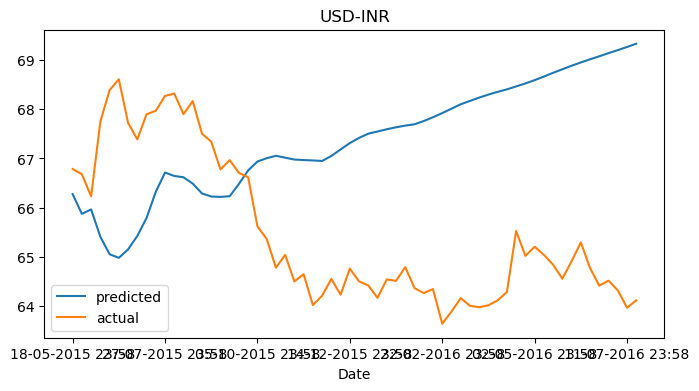

In [248]:
plt.figure(figsize=(8,4))
plt.title("USD-INR")
pred_rates['usdinr'].plot(legend=True,label="predicted")
rates['usdinr'][-n:].plot(legend=True,label="actual")
plt.show()

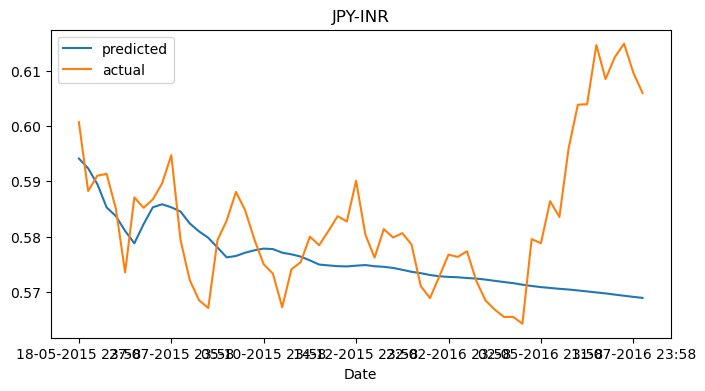

In [249]:
plt.figure(figsize=(8,4))
plt.title("JPY-INR")
pred_rates['jpyinr'].plot(legend=True,label="predicted")
rates['jpyinr'][-n:].plot(legend=True,label="actual")
plt.show()

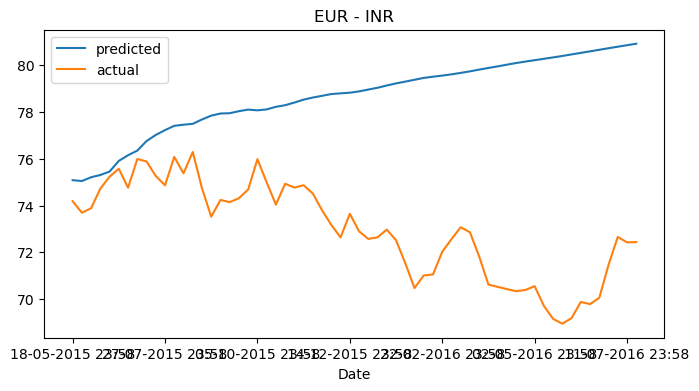

In [250]:
plt.figure(figsize=(8,4))
plt.title('EUR - INR')
pred_rates['eurinr'].plot(legend=True,label='predicted')
rates['eurinr'][-n:].plot(legend=True,label="actual")
plt.show()

In [251]:
# Now predicting using the AR models with the same P value

In [252]:
p

11

In [253]:
model = AutoReg(train['usdinr'],lags=p).fit()
usdinr = model.forecast(n)

model = AutoReg(train['jpyinr'],lags=p).fit()
jpyinr = model.forecast(n)

model = AutoReg(train['eurinr'],lags=p).fit()
eurinr = model.forecast(n)

In [254]:
len(idx)

62

In [255]:
pred = pd.DataFrame({'usdinr' : usdinr,
                    'jpyinr' : jpyinr,
                    'eurinr' : eurinr})
pred

,usdinr,jpyinr,eurinr
249,0.025198,-0.000967,-0.074977
250,0.089654,0.001489,-0.102459
251,0.161220,-0.001127,0.015608
252,0.113570,-0.001563,-0.053108
253,-0.088357,-0.001026,-0.022442
...,...,...,...
306,0.071937,-0.000125,0.049687
307,0.071438,-0.000126,0.049687
308,0.071877,-0.000125,0.049686
309,0.071517,-0.000125,0.049685


In [256]:
pred_rates = pd.DataFrame({'usdinr' : [],
                          'jpyinr' : [],
                          'eurinr' : []})
pred_rates

,usdinr,jpyinr,eurinr


In [257]:
pred_rates['usdinr'] = rates['usdinr'].iloc[-n-1] + pred['usdinr'].cumsum()
pred_rates['jpyinr'] = rates['jpyinr'].iloc[-n-1] + pred['jpyinr'].cumsum()
pred_rates['eurinr'] = rates['eurinr'].iloc[-n-1] + pred['eurinr'].cumsum()

In [258]:
pred_rates

,usdinr,jpyinr,eurinr
249,66.759898,0.595587,75.013923
250,66.849552,0.597076,74.911464
251,67.010771,0.595948,74.927072
252,67.124341,0.594386,74.873964
253,67.035984,0.593359,74.851522
...,...,...,...
306,70.843439,0.588135,78.123342
307,70.914877,0.588010,78.173029
308,70.986754,0.587885,78.222715
309,71.058271,0.587759,78.272400


In [259]:
arusdrmse = rmse(rates['usdinr'][-n:], pred_rates['usdinr'])
arjpyrmse = rmse(rates['jpyinr'][-n:], pred_rates['jpyinr'])
areurrmse = rmse(rates['eurinr'][-n:], pred_rates['eurinr'])
print('RMSE1-',arusdrmse,', RMSE2-',arjpyrmse,', RMSE3-',areurrmse)

RMSE1- 4.3338725755554 , RMSE2- 0.015797594119178863 , RMSE3- 4.765630370182896


In [260]:
print('RMSE1-',varusdrmse,', RMSE2-',varjpyrmse,', RMSE3-',vareurrmse)

RMSE1- 3.1218209971201154 , RMSE2- 0.016080805631104245 , RMSE3- 6.644683018526006


In [261]:
len(pred_rates)

62

In [262]:
pred_rates['idx'] = idx
pred_rates

,usdinr,jpyinr,eurinr,idx
249,66.759898,0.595587,75.013923,2015-05-18 23:58:00
250,66.849552,0.597076,74.911464,2015-05-25 23:58:00
251,67.010771,0.595948,74.927072,2015-06-01 23:58:00
252,67.124341,0.594386,74.873964,2015-06-08 23:58:00
253,67.035984,0.593359,74.851522,2015-06-15 23:58:00
...,...,...,...,...
306,70.843439,0.588135,78.123342,2016-06-20 23:58:00
307,70.914877,0.588010,78.173029,2016-06-27 23:58:00
308,70.986754,0.587885,78.222715,2016-07-04 23:58:00
309,71.058271,0.587759,78.272400,2016-07-11 23:58:00


In [263]:
pred_rates.set_index('idx',inplace=True)

In [264]:
pred_rates.index = pred_rates.index.strftime('%d-%m-%Y %H:%M')
pred_rates

,usdinr,jpyinr,eurinr
idx,,,
18-05-2015 23:58,66.759898,0.595587,75.013923
25-05-2015 23:58,66.849552,0.597076,74.911464
01-06-2015 23:58,67.010771,0.595948,74.927072
08-06-2015 23:58,67.124341,0.594386,74.873964
15-06-2015 23:58,67.035984,0.593359,74.851522
...,...,...,...
20-06-2016 23:58,70.843439,0.588135,78.123342
27-06-2016 23:58,70.914877,0.588010,78.173029
04-07-2016 23:58,70.986754,0.587885,78.222715


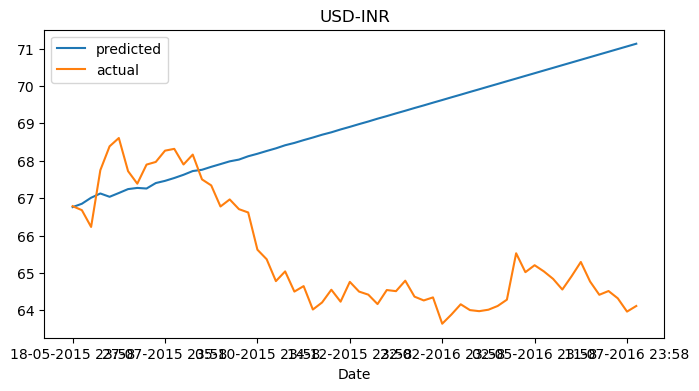

In [265]:
plt.figure(figsize=(8,4))
plt.title("USD-INR")
pred_rates['usdinr'].plot(legend=True,label="predicted")
rates['usdinr'][-n:].plot(legend=True,label="actual")
plt.show()

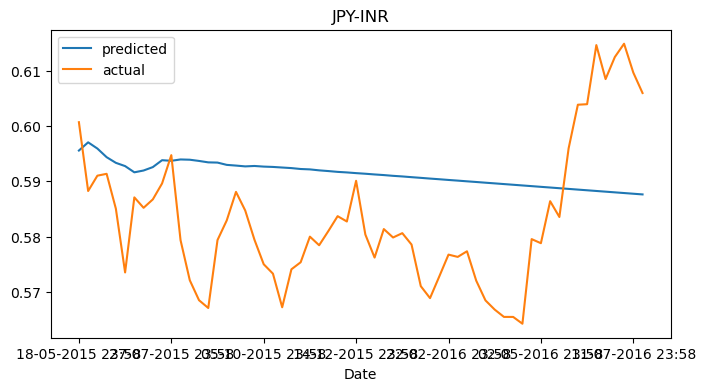

In [266]:
plt.figure(figsize=(8,4))
plt.title("JPY-INR")
pred_rates['jpyinr'].plot(legend=True,label="predicted")
rates['jpyinr'][-n:].plot(legend=True,label="actual")
plt.show()

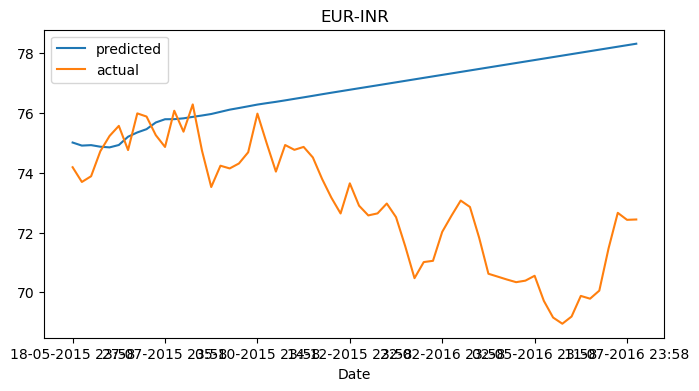

In [267]:
plt.figure(figsize=(8,4))
plt.title("EUR-INR")
pred_rates['eurinr'].plot(legend=True,label="predicted")
rates['eurinr'][-n:].plot(legend=True,label="actual")
plt.show()